# Introduction to Bayes Models

### Data Science 410

## Introduction

So far, we have mostly worked with frequentist statistical methods. Frequentist models make inferences using only data and model assumptions. There is another class of statistical models with a long and successful history, Bayesian models. In contrast to the frequentist approach, Bayesian models use **prior information** as well as data and model assumptions to perform inferences.   

Despite the long history, Bayesian models have not been used extensively until recently. This limited use is a result of several difficulties. The need to specify a **prior distribution** of known information has proved a formidable intellectual obstacle and is often cited as a reason for not using Bayesian methods. Further, modern Bayesian methods are often computationally intensive and have become practical only in the past few decades. Finally, the recent emergence of improved software and algorithms has resulted in wide and practical access to Bayesian methods.         

<img src="img/Sun.png" alt="Drawing" style="width:350px; height:450px"/>
<center>A Bayesian would win this bet</center>


## Brief history

A restricted version of Bayes Theorem was proposed by Rev.Thomas Bayes (1702-1761). Bayes Theorem, was published posthumously by his friend Richard Price. Bayes' interest was in probabilities of gambling games. He was also a supported Isac Newton's new theory of calculus, with his publication, *An Introduction to the Doctrine of Fluxions, and a Defence of the Mathematicians Against the Objections of the Author of The Analyst*.

![](img/ThomasBayes.gif)

Pierre-Simon Laplace published a far more general version of Bayes Theorem, similar to its modern form, in his Essai philosophique sur les probabilités 1814. Laplace applied Bayesian methods to problems in celestial mechanics. These problems had great practical importance in the late 18th and early 19th centuries for the safe navigation of ships; the cutting edge technology problem of the age.  
 
![](img/Laplace.jpg)

 ### Early 20th Century History

The geophysicist and mathematician Harold Jefferys extensively used Bayes' methods. His 1939 book, *The Theory of Probability* was in deliberate opposition to Fisher's maximum likelihood methods. The publication of his book set off a feud between Jefferys and Fisher which lasted until the death of both men in the 1970s. The feud resulted in Bayesian methods rarely being taught or used in scientific publications for many decades. Thus, the development and use of Bayesian models was limited in the mid 20th Century.   

<img src="img/JeffreysProbability.jpg" alt="Drawing" style="width:225px; height:300px"/>
<center>Jefferys' seminal 1939 book</center>

The battle between Fisher, Jefferys, and their protégés continued for most of the middle 20th century. This battle was bitter and often personal. The core of these argument were:

- Fisher argued that the selection of a Bayesian prior distribution was purely subjective, allowing one to achieve any answer desired.
- Jefferys argued that all knowledge is in fact subjective, and that choosing a cut-off value or confidence interval was subjective in any event.

Despite the philosophical squabbles, Bayesian methods endured and showed an increasing number of success stories. Pragmatists continued to use both approaches. For example, there were some notable success during the Second World War, included:     
- Bayesian models were used to improve artillery accuracy in both world wars. In particular the Soviet statistician Kolmagorov used Bayesian methods to greatly improve artillery accuracy. 
- Bayesian models were used by Alan Turing to break German codes.
- Bernard Koopman, working for the British Royal Navy, improving the ability to locate U-boats using directional data from intercepted radio transmissions. 

### Late 20th Century History  

Starting in the second half of the 20th century the convergence of greater computing power and general acceptance lead to the following notable advances in computational Bayesian methods. The following publications are notable milestones in the advancement of Bayesian methods:   
- Statistical sampling using Monte Carlo methods; Stanislaw Ulam, John von Neuman; 1946, 1947.   
- MCMC, or Markov Chain Monte Carlo; Metropolis et al. (1953) Journal of Chemical Physics.   
- Monte Carlo sampling methods using Markov chains and their application, Hastings (1970).   
- Stochastic relaxation, Gibbs distributions and the Bayesian restoration of images, Geman and Geman (1984).   
- Hamiltonian MCMC, Duane, Kennedy, Pendleton, and Roweth (1987).    
- Sampling-based approaches to calculating marginal densities, Gelfand and Smith (1990).    

### 21st Century  

In the 21st Century Bayesian models are in daily routine use. These applications range across the scope of statistical model applications. A few examples include medical research, natural language understanding, and web search.  One of the more interesting applications is in management of [search and rescue operations](https://sinews.siam.org/Details-Page/bayesian-search-for-missing-aircraft-ships-and-people). Bayesian models have found uses in [legal judgements](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4934658/) when faced with diverse and uncertain evidence.  

A significant recent advance is the No-U-Turn (NUTS) sampler, published by Hoffman and Gelman in 2011, was a significant advance in Hamiltonian MCMC sampling, eliminating the need for hand tuning. This method represents the state of the art in sampling. NUTS makes MCMC method routinely acceptable for high dimensional problems.   

## Bayesian vs. Frequentist Views

With greater computational power and general acceptance, Bayes methods are now widely used. Among pragmatists, the common belief today is that some problems are better handled by frequentist methods and some with Bayesian methods. Models that fall between these extremes are also in common use.  

Let's summarize the differences between the Bayesian and frequentist views. 

- The goal of Bayesian methods computation of a **posterior distribution**. Bayesian methods use **prior distributions** combined with **evidence** to compute the posterior distribution. 
- Bayesian posterior distributions are updated when more evidence is collected. 
- Frequentists do not quantify anything about the parameters, using p-values and confidence intervals to express the properties of parameters given the data.
- Frequentist methods are based on a sample, and models must be recomputed when additional evidence is collected. 

Recalling that both views are useful, we can contrast these methods with a chart.

<img src="img/FrequentistBayes.jpg" alt="Drawing" style="width:500px; height:325px"/>
<center>Comparison of Bayesian and frequentist models</center>


![](img/.jpg)

### Software

Most Bayes software packages use efficient Markov chain Monte Carlo (MCMC) methods. The most widely used of these is [Stan](https://mc-stan.org/), named for mathematician Stanislaw Ulam. Stan also includes variational approximation methods. 

A powerful and considerably more user friendly Python package is [PyMC3](https://docs.pymc.io/). We will use PyMC3 in this lesson. The documentation for PyMC3 includes an excellent [Getting Started Jupyter Notebook](https://docs.pymc.io/notebooks/getting_started.html) along with other tutorials. Additionally you can find a number of [example Jupyter notebooks][(https://docs.pymc.io/nb_examples/index.html) for many application areas.  

## Bayes Theorem and Conditional Probability

As you have likely guessed from the name, Bayesian models are built upon **Bayes' Theorem** or **Bayes' Rule**, a fundamental relationship for **conditional probability**.

<img src="img/BayesDeNeon.jpg" alt="Drawing" style="width:400px; height:300px"/>


### Conditional probability

Let's briefly review **conditional probability**. Conditional probability is the probability that event A occurs given that event B has occurred. Consider the example of events in a space S with subspaces A and B, shown below. 

<img src="img/Prob1.png" alt="Drawing" style="width:300px; height:200px"/>

We can write a conditional probability relationship between the subsets as follows. We write the conditional probability of A given B:

$$P(A|B)$$

Let's try to find the relationship between conditional probability and the intersection between the sets, $P(A \cap B)$. To find this probability notice that it is the product of two probabilities:  
1. $P(B)$ since B must be true to be in this intersection. 
2. $P(A|B)$ since A must also occur when B is occurring.

We can now write:

$$P(A \cap B) = P(A|B) P(B)$$

Rearranging terms we get the following for our example: 

\begin{align}
P(A|B) &= \frac{P(A \cap B)}{P(B)} \\
& = \frac{\frac{2}{10}}{\frac{4}{10}} = \frac{2}{4} = \frac{1}{2}
\end{align}


### Bayes Theorem

As has already been stated, Bayes' Theorem is fundamental to Bayesian data analysis. To get started, let's go through a simple derivation of Bayes, theorem. From the previous section we have:

$$P(A|B) P(B) = P(A \cap B)$$

Using the same approach, we can also write: 

$$P(B|A) P(A) = P(A \cap B)$$

Eliminating $P(A \cap B):$

$$ P(B)P(A|B) = P(A)P(B|A)$$

Or, 

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Which is Bayes' Theorem!

### Interpreting Bayes Theorem

But, how can you interpret Bayes' Theorem in a way that is useful for data analysis? The following interpretation is a foundation of Bayesian analysis.  

$$Posterior\ Distribution = \frac{Likelihood \bullet Prior\ Distribution}{Evidence} $$

In general, we are interested in estimating the posterior distribution of model parameters. In this case, we can think of Bayes' theorem by the following:   

$$𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠│𝑑𝑎𝑡𝑎) = \frac{𝑃(𝑑𝑎𝑡𝑎|𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠)\ 𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠)}{P(data)} $$

So, what does the above actually mean? Let's decompose these expressions term by term, focusing on the typically case of parameter distributions:    
1. **Prior distribution** is chosen to express information available apriori. The specification of the prior distribution will be discussed further in this lesson.      
2. The **likelihood** is the conditional distribution of the data given the model parameters.   
3. The **evidence** is the distribution of the data. This distribution acts to normalize the product of the likelihood and prior distribution so that the result is  proper posterior distribution.    
4. The conditional **posterior distribution** of the parameters given the evidence or data. Computing this posterior distribution is the goal of Bayesian analysis.     

## Marginal Distributions   

Consider a multivariate distribution. A **marginal distribution** is the distribution of one variable with the others integrated out. 

In many cases of Bayesian analysis we are interested in the marginal distribution. For example, it is often the case that only one or a few parameters will be of interest. The behavior of these parameters is characterized by the marginal distribution. For this reason, computing marginal distributions is an important aspect of Bayesian analysis.  

Consider a multivariate probability density function with $n$ variables, $p(\theta_1, \theta_2, \ldots, \theta_n)$. If we integrate over all other variables $\{ \theta_2, \ldots, \theta_n \}$ the result is the marginal distribution with respect to the remaining variable, $p(\theta_1)$. This marginal distribution is computed from the following relationship.       

$$p(\theta_1) = \int_{\theta_2, \ldots, \theta_n} p(\theta_1, \theta_2, \ldots, \theta_n)\ d\theta2, \ldots, d \theta_n$$

****************
**Exercise:** A simple example will make the concept of marginal distributions less abstract. You will chart a bi-variate distribution along with the marginal distribution of the two variables.   

In this case, you will work with the bivariate Normal distribution, $N( \mu, \Sigma^2)$, where $\mu$ is the 2-vector of means and $\Sigma^2$ is the 2x2 covariance matrix. For the two vector, $\mu = [X,Y]$, the marginal distributions are:   

$$
p(X) = \int_Y N( [X,Y], \Sigma^2)\ dY \\
p(Y) = \int_X N( [X,Y], \Sigma^2)\ dX
$$

As a first step, execute the code in the cell below to import the packages you will need for the rest of this notebook.     

In [223]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import itertools

%matplotlib inline

The code in the cell below creates a contour plot of 5,000 samples drawn from a bi-variate normal distribution with:   

$$
\mu = 
\begin{bmatrix}
0.0 \\
0.0 \\
\end{bmatrix} \\
\Sigma^2 = 
\begin{bmatrix}
1.5 & 0.5 \\
0.5 & 1.0 \\
\end{bmatrix}
$$

Execute the code in the cell below and examine the results.

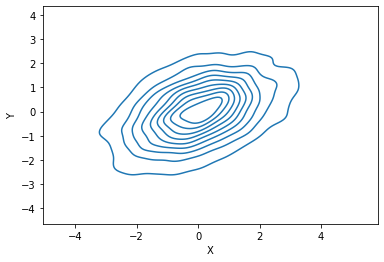

In [224]:
bi_variate_normal = nr.multivariate_normal([0.0, 0.0], np.array([[1.5, 0.5], [0.5, 1.0]]), size=5000)
bi_variate_normal = pd.DataFrame(bi_variate_normal, columns=['X','Y'])
_=sns.kdeplot(data=bi_variate_normal, x='X', y='Y')

Now, you are ready to plot the marginal densities of the variables, X and Y. You will not need to actually compute any integrals. Instead, you can use nonparametric density estimates for each variable. Follow these steps:  
1. Create a set of Matplotlib axis to place two density plots, one over the other.   
2. Use ax[].set_xlim() to set the x-axis limits to the range $[-6.0,6.0]$, so that you can compare the two plots.    
3. Display the density estimates of X and Y using the [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function. Make sure you include a title, so you know which plot is which.   

Text(0.5, 1.0, 'Marginal density of Y')

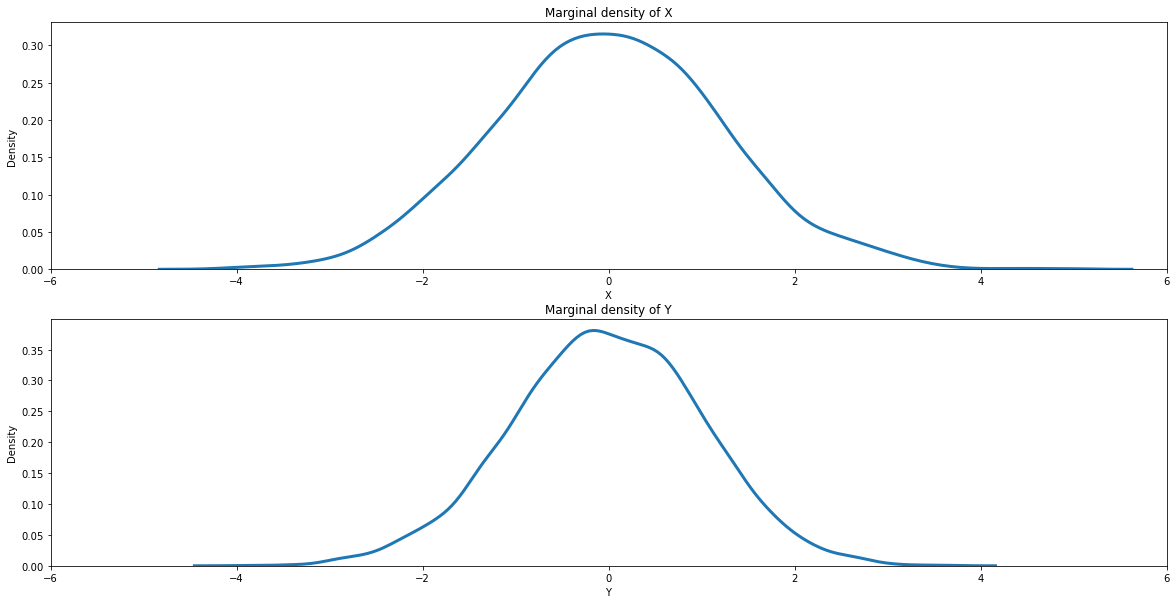

In [225]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10)) 
ax[0].set_xlim(-6.0,6.0)
ax[1].set_xlim(-6.0,6.0)
_=sns.kdeplot(data=bi_variate_normal, x='X', ax=ax[0], linewidth=3)
_=sns.kdeplot(data=bi_variate_normal, x='Y', ax=ax[1], linewidth=3)
ax[0].set_title('Marginal density of X')
ax[1].set_title('Marginal density of Y')

Notice the differences in the two density plots. Are these differences expected in terms of dispersion and shape, and why? 

### Example, probabilities of eye and hair color

Let's consider another example of working with marginal and conditional distributions. This example follows Section 5.1.2 of Kruschke (2015).    

A sample population has the following probabilities of eye and hair color combinations. These values are the joint probabilities $p(eye,hair) = p(hair,eye)$. Execute the code to see the table of these probabilities.

In [226]:
eye_hair = pd.DataFrame({
    'black': [0.11, 0.03, 0.03, 0.01], 
    'brunette': [0.2, 0.14, 0.09, 0.05],
    'red': [0.04, 0.03, 0.02, 0.02],
    'blond': [0.01, 0.16, 0.02, 0.03],
}, index=['brown', 'blue', 'hazel', 'green'])

eye_hair

,black,brunette,red,blond
brown,0.11,0.20,0.04,0.01
blue,0.03,0.14,0.03,0.16
hazel,0.03,0.09,0.02,0.02
green,0.01,0.05,0.02,0.03


How can we understand these joint probabilities in terms of conditional probabilities? We can express this relationship as:  

$$p(eye,hair) = p(eye|hair)p(hair) = p(hair|eye)p(eye) = p(hair,eye)$$

At first glance, this relationship can look confusing. But, keep in mind that the above table can be read either row wise or column wise. The joint probability must be the same in either case. 

Note: here we're using a string index for eye color rather than a numeric zero-based index. So to access a given (eye, hair) color value, index the dataframe like so:

In [227]:
eye_hair.loc['hazel', 'red']

0.02

Given these joint probabilities, it is easy to compute the marginal probabilities of either the eye or hair color by summing the probabilities in the rows and columns. Since this problem involves discrete values, we can use simple summation. Hair color is in the columns, and the marginal distribution is computed by summing over each of the rows. Similarly, the eye color is in the rows, so the marginal distribution is computed by summing over each of the columns. We can express these operations mathematically:   

$$
p(hair) = \sum_{rows} p(hair|eye)\ p(eye) = \sum_{rows} p(hair,eye) \\
p(eye) = \sum_{columns} p(eye|hair)\ p(hair) = \sum_{columns} p(hair,eye)
$$

Like all probability distributions, the probabilities of a marginal distribution must sum to 1.0. It is always good to check this condition to ensure the sums have been applied correctly.  

***********************
**Exercise:** In the cell below create the code to compute the marginal distributions, $p(eye)$ and $p(hair)$. Make sure you check that these marginal probabilities sum to approximately 1.0.  

In [228]:
## Compute the marginal distribution of each eye color
eye_hair['marginal_eye'] = eye_hair.sum(axis=1)
print('THe sum of marginal eye distribution = {:6.4f}'.format(eye_hair['marginal_eye'].sum(axis=0)))
eye_hair.loc['marginal_hair'] = eye_hair.sum(axis=0)
eye_hair

THe sum of marginal eye distribution = 0.9900


,black,brunette,red,blond,marginal_eye
brown,0.11,0.20,0.04,0.01,0.36
blue,0.03,0.14,0.03,0.16,0.36
hazel,0.03,0.09,0.02,0.02,0.16
green,0.01,0.05,0.02,0.03,0.11
marginal_hair,0.18,0.48,0.11,0.22,0.99


What inferences can you make from these marginal distributions? What is the most common eye color? What is the least common hair color?

*****************************************
**Exercise:** Use Bayes Theorem to compute the conditional probability of each hair color given that the subject has blue eyes; $P(Hair\ Color|Blue\ Eyes)$. To perform this calculation, keep the following in mind:   
1. The joint distribution of hair and eye color can be expressed in terms of a conditional probability; $p(hair,eye) = p(hair|eye)p(eye)$.   
2. The denominator required to apply Bayes Theorem is the marginal probability, for the eye color; $p(eye) = \sum_{columns} p(hair,eye)$.   

To ensure your results are a proper distribution, make sure the conditional probabilities add to 1.0. 

In [229]:
compute_conditional = lambda hair: eye_hair.loc['blue', hair]/eye_hair.loc['blue', 'marginal_eye']
conditional_eye_hair = np.apply_along_axis(compute_conditional, 0, list(eye_hair.columns)[:-1])
print('Sum of conditional probabilities = {:4.6f}'.format(np.sum(conditional_eye_hair )))
print(pd.Series(conditional_eye_hair , index=list(eye_hair.columns)[:-1]))

Sum of conditional probabilities = 1.000000
black       0.083333
brunette    0.388889
red         0.083333
blond       0.444444
dtype: float64


## Applying Bayes Theorem

We need a formulation of Bayes Theorem which is tractable for computational problems. Specifically, we don't want to be stuck summing all of the possibilities to compute the denominator, $P(B)$. In fact, in many cases, computing this denominator directly is intractable.  

We can start by examining some interesting facts about conditional probabilities. 

$$
𝑃(𝐵 \cap A) = 𝑃(𝐵|𝐴)𝑃(𝐴) \\
And \\
𝑃(𝐵)=𝑃(𝐵 \cap 𝐴)+𝑃(𝐵 \cap \bar{𝐴}) 
$$

Where, $\bar{A} = Not\ A$. So, the marginal distribution, $P(B)$, can be written:   

$$
𝑃(𝐵)=𝑃(𝐵|𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴})
$$

Using the above relations we can rewrite Bayes Theorem as:

$$ P(A|B) = \frac{P(A)P(B|A)}{𝑃(𝐵│𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴})} \\ $$

In summary, to compute the denominator we need to sum all the cases in the subset A and all the cases not in the subset A. This is a bit of a mess. But fortunately, we can get quite a ways without computing this denominator by force. We can rewrite Bayes Theorem as:

$$𝑃(𝐴│𝐵)=𝑘∙𝑃(𝐵|𝐴)𝑃(𝐴)$$

Ignoring the normalization constant $k$, we get:

$$𝑃(𝐴│𝐵) \propto 𝑃(𝐵|𝐴)𝑃(𝐴)$$

### Applying the simplified relationship Bayes Theorem

How to we interpret the relationship shown above? We can do this as follows:

$$Posterior\ Distribution \propto Likelihood \bullet Prior\ Distribution \\
Or\\
𝑃( 𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠 │ 𝑑𝑎𝑡𝑎 ) \propto 𝑃( 𝑑𝑎𝑡𝑎 | 𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠 )𝑃( 𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠 ) $$

The above means that we can find a function proportional to the posterior distribution without the denominator. Once we have these values, we can sum over them to find the marginal distribution $P(B)$. In practice this approach can transform an intractable computation to a simple summation. 

These relationships can apply to the parameters in a model, including partial slopes, intercept, error distributions, lasso constant, etc. 

## Creating Bayes models

The goal of a Bayesian model is to find the posterior distribution of the model parameters and perform inference on this distribution. The general steps are as follows:

1. Identify data relevant to the research question. Unlike for frequentist models, data need not be collected in advance.   
2. Define a descriptive model for the data. For example, a linear regression model might be used for a problem.
3. Specify a prior distribution of the model parameters. For example, you might believe that the parameters of the linear model should be Normally distributed as $N(\theta,\sigma^2)$.
4. Use the Bayesian inference formula (above) to compute posterior distribution of the model parameters. If there is no data as yet, the posterior distribution is the same as the prior distribution. 
5. Update the posterior if more data is observed. This is key! The posterior of a Bayesian model naturally updates as more data is added, a form of learning. In this case, the previous posterior serves as a prior for the model update. 
6. Inference on the posterior can be performed. 
7. Optionally, simulate data values from realizations of the posterior distribution. These values are predictions from the model. 

### How can you choose a prior?

The choice of the prior is a serious, and potentially vexing, problem when performing Bayesian analysis. In fact, the need to choose a prior has often been cited as a reason why Bayesian models are impractical. General guidance is that a prior must be convincing to a **skeptical audience**. But this guidance is vague in practice.   

There are a number of ways one can create a good prior distribution. Some possible approaches include:

- Using prior empirical information about the problem. This might include information  
- Apply domain knowledge to determine a reasonable distribution. For example, viable range of parameter values could be computed from physical principles. 
- Parameters of a prior distribution can be empirically estimated from data. This method is broadly known as **empirical Bayes**. Typically, a less informative distribution is used than the actually empirical distribution so the model is not overly constrained. .        
- If there is poor prior knowledge for the problem use less informative prior. One possibility is a Uniform distribution. But **watch out**, a uniform prior is informative, since you must set the limits on range of values! There can be other options for uninformative distributions, such as the [Jefferys' prior](https://en.wikipedia.org/wiki/Jeffreys_prior).      
 
 

### Conjugate Priors   

An analytically and computationally simple choice for a prior distribution family is a **conjugate prior**. When a likelihood is multiplied by its conjugate prior distribution the posterior distribution is the same family as the prior. This idea is attractive, since for cases where the conjugate distribution exists, analytical results can be computed.     

Most named distributions have conjugates. A few commonly used examples are shown in the table below:

Likelihood | Conjugate
---|---
Binomial|Beta
Bernoulli|Beta
Poisson|Gamma
Categorical|Dirichlet
Normal - mean| Normal
Normal - variance | Inverse Gamma, Half Cauchy
Normal - inverse variance, $\tau$ | Gamma

However, there are many practical cases where a conjugate prior is not used. With modern computational methods, a conjugate prior distribution is not required. But, in these cases, no analytical solution is likely to exist.  

## First Extended Example

With a bit of theory in mind, let's apply these concepts with an example. Let's say we are interested in analyzing distracted drivers. We randomly sample the behavior of 10 drivers at an intersection and determine if they exhibit distracted driving or not. The data are binomially distributed, a driver is distracted or not. In the example we will:

1. Select the Binomial distribution for the likelihood.
2. Choose an uninformative prior distribution.  Specifically use the conjugate prior, the Beta distribution with parameters $\alpha$ and $\beta$.   
3. Using the data sample, compute the likelihood.
4. Compute the posterior distribution of distracted driving. 
5. Try another prior distribution and repeat step 4.
5. Add more evidence (data) and updated the posterior distribution.

The Binomial likelihood has one parameter we need to estimate, $p$, the probability of success. The concept of success should be interpreted broadly as a positive case. In this case success is a distracted driver. We can write this formally for $k$ successes in $n$ trials:

$$ P(k) = \binom{n}{k} \cdot p^k(1-p)^{n-k}$$

The code in the cells below creates a simple data set of distracted and not-distracted drivers and computes some simple summary statistics. Execute this code. 

In [230]:
drivers = ['yes','no','yes','no','no','yes','no','no','no','yes']
distracted = [1 if x is 'yes' else 0 for x in drivers]
distracted

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]

In [231]:
N = len(distracted)  # sample size
n_distracted = sum(distracted)  # number of distracted drivers
n_not = N - n_distracted # number not distracted
print('Distracted drivers = %d \nAttentive drivers = %d'
    '\nEmpirical robability of distracted driving = %.1f' 
      % (n_distracted, n_not, n_distracted / (n_distracted + n_not)))

Distracted drivers = 4 
Attentive drivers = 6
Empirical robability of distracted driving = 0.4


### The Beta prior

Let's explore the properties of the conjugate prior, the Beta distribution. The Beta distribution has two parameters, $a$ and $b$. The Beta distribution is defined on the range $0 \le Beta(p |a, b) \le 1$. Formally, we can write the density function of the Beta distribution:

$$Beta(p |a, b) = \kappa x^{a-1}(1 - x)^{b-1} \\
where,\ \kappa = normalization\ constant$$

The normalization constant, $\kappa$, is computed using a [Beta function](https://en.wikipedia.org/wiki/Beta_function_) (not to be confused with the Beta distribution). This normalization ensures that the Beta distribution is proper; $\int_0^1 Beta(p |a, b) = 1.0$. We will not explore the mathematical properties of the Beta function in this lesson. 

The two parameters of the Beta distribution, $a$ and $b$, determine its shape. These parameters have a valid range, $0 \le a,b \le 1$. To get a feel for the Beta distribution, execute the code in the cell below which computes 25 examples of the density function on a 5x5 grid. 

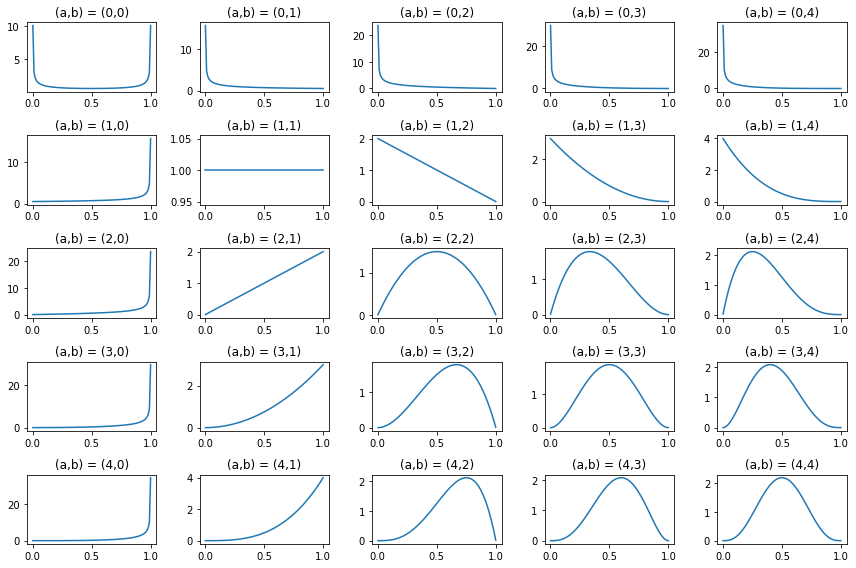

In [232]:
plt.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = np.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    plt.subplot(len(alpha), len(beta), i+1)
    plt.plot(x, scipy.stats.beta.pdf(x, a, b))
    plt.title('(a,b) = (%d,%d)' % (a,b))
plt.tight_layout()    

You can see from the plots above, that the Beta distribution can take on quite a range of shapes, depending on the parameters.. Examine these plots and answer the following questions:   
1. When is the density function of the Beta distribution symmetric?   
2. As $a$ and $b$ increase how does the shape of the distribution change? 
3. How does the relationship between the values of $a$ and $b$ change the skew of the distribution? 

### Analytical solution with conjugate prior  

It helps understanding to consider the distribution of the product of a Binomial likelihood and a Beta prior. Let's do a bit of algebra and find the result. Let's define the evidence as n trials with z successes. The prior is a Beta distribution with parameters $a$ and $b$. We denote the normalizing Beta function as $B(a,b)$. We start with Bayes Theorem to find the Beta distribution of the posterior:    

\begin{align}
posterior(\theta | z, n) &= \frac{likelihood(z,n | \theta)\ prior(\theta)}{data\ distribution (z,n)} \\
p(\theta | z, n) &= \frac{p(z,n | \theta)\ p(\theta)}{p(z,n)} \\
&= \frac{Binomial(z,n | \theta)\ Beta(\theta)}{p(z,n)} \\
&= \frac{\theta^z(1-\theta)^{n-z}}{p(z,n)} \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)} \\
&= \frac{\theta^{z + a -1}(1-\theta)^{n-z+b-1}}{B(z+a,\ n-z+b)} \\
&= Beta(z + a -1,\ n-z+b-1)
\end{align}

There are some useful insights you can gain by examining the last line of the derivation above.    
- As expected, the posterior distribution is in the Beta family. The parameters $a$ and $b$ are determined by the prior and the evidence.  
- The parameters of the prior can be interpreted as **pseudo counts** of successes, $a-1$ and failures, $b-1$. Be careful when creating a prior to **add 1** to the successes and failures. The larger the total pseudo counts, $a + b$, the **stronger the prior information**.  
- The evidence is also in the form (actual) counts of successes, $z$ and failure, $n-z$. The more the available evidence the greater the influence on the posterior distribution. A large amount of evidence will overwhelm the prior.    

### Picking an uninformative prior distribution. 

Let's pick an initial prior distribution. Combined with the likelihood we can then compute a posterior distribution, $P(p)$, for the one model parameter $p$.    

In a case where we have no useful information in advance, an **uninformative prior distribution** can be an appropriate choice. For this example, a uniform distribution can be used. The Beta distribution with $(a,b) = (1,1)$ is the uniform distribution. This is the same as saying the pseudo counts of success and failures are both 0.   

The code in the cell below computes and plots the Beta prior distribution. Execute this code and examine the results. 

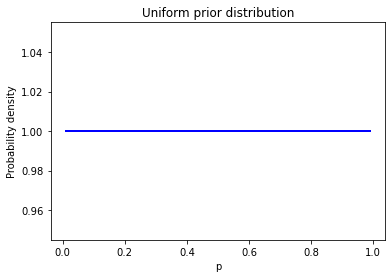

In [233]:
def beta_prior(p, a, b):
    pp = scipy.stats.beta.pdf(p, a, b)
    return pp

N = 100
p = np.linspace(.01, .99, num=N)
pp = beta_prior(p, 1.0, 1.0 )
plt.plot(p, pp, linewidth=2, color='blue')
plt.xlabel('p')
plt.ylabel('Probability density')
_=plt.title('Uniform prior distribution')

### The likelihood function

Next, we need to compute the likelihood. The likelihood is the probability of the data given the parameter and the data, $P(X|p)$. The code in the cell below computes and plots the Binomial likelihood for the distracted driver data. The **probability mass function**, [scipy.stats.binom.pmf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html), is used to compute the likelihood for each value of the parameter $p$, given the data. Notice that we are using a probability mass function since the Binomial distribution is discrete.   

Execute this code and examine the results.

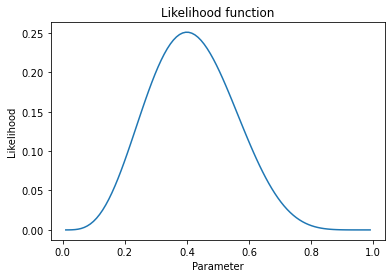

In [234]:
def binomial_likelihood(p, data):
    k = sum(data)
    n = len(data)
    return scipy.stats.binom.pmf(k, n, p)

l = binomial_likelihood(p, distracted)
plt.plot(p, l)
plt.title('Likelihood function')
plt.xlabel('Parameter')
_=plt.ylabel('Likelihood')

Examine this result and answer these questions:
1. Does the maximum of this likelihood curve appear to be at $p=0.4$, the estimated parameter value?
2. Does it make sense that the values of the likelihood are nearly 0 at the extremes of the parameter value range, and why?  

### Computing the posterior distribution

Now that you have a prior and a likelihood we are in a position to compute the posterior distribution of the parameter $\theta$, given the evidence, $X$, or $P(\theta|X)$. 

To perform this calculation, the product of the prior density by the likelihood is computed. The numerator of Bayes Theorem. Then, this result must then be normalize. The normalization is computing the marginal distribution of the data by summing the numerator over the parameter, $\theta$:  

$$p(X) = \sum_{\theta} p(X | \theta)\ p(\theta)$$

> **Warning!** The computational methods used in this notebook are simplified for the purpose of illustration. For real-world problems, computationally efficient methods code must be used!

******************************
**Exercise:** Use the likelihood and prior distributions just created to compute and plot the posterior distribution of the Binomial parameter, $p$. The functions in the cell below display plots the prior density, the likelihood and the posterior distribution. The maximum value of the parameter, $\theta$, is printed for the prior, likelihood and posterior. The later estimate is known as the **maximum apostiori** or **MAP**. You must complete the *posterior* function below and execute the code in the cell.    


9.183673470546148
1.0


Maximum of the prior density = 0.010
Maximum likelihood = 0.400
MAP = 0.400


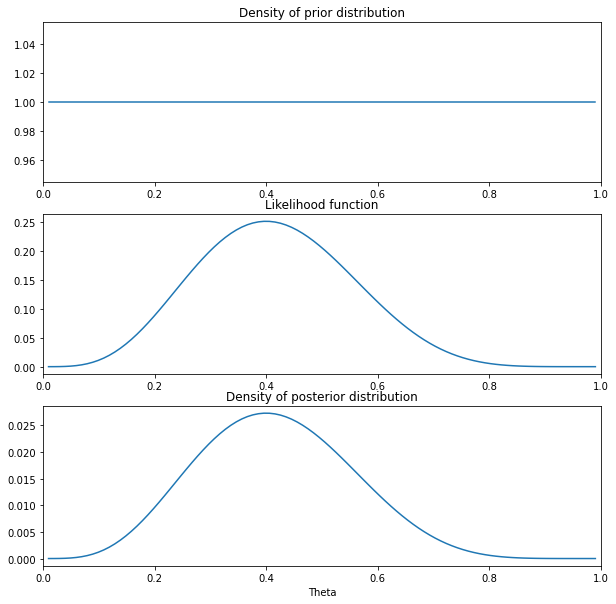

In [235]:
def posterior(prior, like):
    ## Complete this function so that it returns the normalized posterior distribution
    post = np.multiply(prior, like) # compute the product of the probabilities
    print(post.sum())
    print(np.divide(post, post.sum()).sum())
    return np.divide(post, post.sum()) # Noemalize and return

def plot_distribution(dist, theta, ax, title):
    ax.plot(theta, dist)
    ax.set_title(title)
    ax.set_xlim(0, 1)

def plot_post(prior, like, post, theta):
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))
    plot_distribution(prior, theta, ax[0], 'Density of prior distribution')
    plot_distribution(like, theta, ax[1], 'Likelihood function')
    plot_distribution(post, theta, ax[2], 'Density of posterior distribution')
    ax[2].set_xlabel('Theta')
    print_maximums(prior, like, post)

def print_maximums(pp, l, post):
    print('\n\nMaximum of the prior density = %.3f' % float(float(np.argmax(pp))/100.0 + 0.01)) 
    print('Maximum likelihood = %.3f' % float(float(np.argmax(l))/100.0 + 0.01))
    print('MAP = %.3f' % float(float(np.argmax(post))/100.0 + 0.01))
    
post = posterior(pp, l)
plot_post(pp, l, post, p)

Answer the following questions:  
1. Given the prior, is the identical shapes of the likelihood and posterior expected?    
2. Frequentist statistics is largely based on likelihood functions and the maximum likelihood method. When the prior is a uniform distribution, as in the preceding example, is there any substantive difference between Bayesian and frequentist analysis? What does this tell you about the similarity of these methods?   

### Analysis with another prior

How will changing the prior influence the posterior. Imagine we acquired some prior information from a national study of distracted drivers. The finding of the study is that one in 10 drivers is distracted on average.  

*****************************
**Exercise:** You will now incorporate the prior information from the national study in the Bayesian analysis. Since the national study collected data on a great number of drivers, you will use a stronger prior with total pseudo counts $a + b = 10$. To complete tis analysis, do the following:     
1. Compute the density function of the new prior distribution. 
2. Compute the posterior distribution using the previously computed likelihood and the new prior.  
3. Plot and print the results using the plot_post function.   

3.2839451730690357
1.0


Maximum of the prior density = 0.010
Maximum likelihood = 0.400
MAP = 0.220


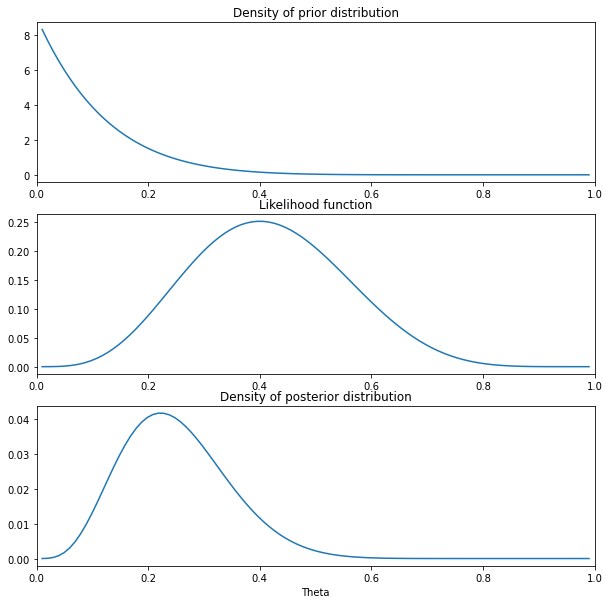

In [236]:
pp = beta_prior(p, 1, 9)
post = posterior(pp, l)
plot_post(pp, l, post, p)

Examine the results and answer these questions:    
1. Does the prior represent the results of the national study and why?    
2. Notice the difference between the likelihood and the prior. Pay particular interest to the model and right tail of the posterior distribution. Is this expected given the new prior and why?   

### Analytical solution

As we discussed earlier in this lesson, the Beta distributed posterior can be computed analytically. Recall, the parameters of the posterior Beta distribution incorporate both counts and pseudo counts for success and failures. These parameters are computed as: 
\begin{align}
a &= success + pseudo\ success \\
b &= total\ counts - success + pseudo\ failures 
\end{align}

******************
**Exercise:** Now you will compute and plot the analytically derived posterior Beta distribution for the distracted driving problem. Perform the following steps:
1. From the list *distracted* and the pseudo counts of the prior distribution compute the parameters, $a$ and $b$ of the posterior distribution.  
2. Plot the density of the posterior vs. the values of the Binomial parameter $\theta$.   
3. Print the MAP value of $\theta$. 

a = 5  b= 15
MAP = 0.220


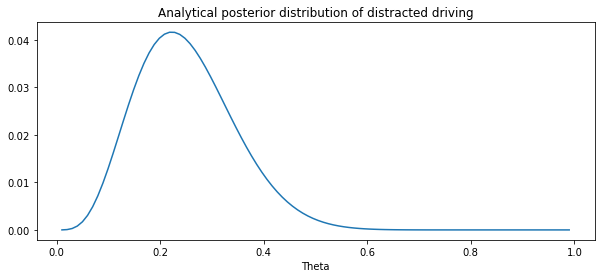

In [239]:
def analytic_posterior(distracted, p, pseudo_sucess, pseudo_fail): 
    success = sum(distracted)
    n = len(distracted)
    
    ## Add code to find a and b
    a = success + pseudo_sucess
    b = n - success + pseudo_fail
    print('a = ' + str(a) + '  b= ' + str(b))
    
    ## Add code to compute normalized posterior
    beta_post = scipy.stats.beta.pdf(p, a, b)
    beta_post = np.divide(beta_post, beta_post.sum())
    
    ## Plot density and print MAP
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(p, beta_post)
    ax.set_title('Analytical posterior distribution of distracted driving')
    ax.set_xlabel('Theta')
    print('MAP = %.3f' % float(float(np.argmax(beta_post))/100.0 + 0.01))
    
analytic_posterior(distracted, p, 1, 9)    

## Adding data to the Bayesian model

We will now examine one of the most interesting properties of Bayesian models. The ability to update a model using new evidence. This is in contrast to frequentist analysis, where the model computation must be done from scratch.     

Let's say that we observe some more drivers to gather more data on distracted driving. We can summarize the effects of adding additional evidence to a Bayesian model as:     
- Additional data will narrow the spread or dispersion of the posterior distribution. 
- As data are added to a Bayesian model, the posterior moves toward the likelihood. 
- The prior matters less as more data is added to a Bayesian model.
- The inferences from Bayesian and frequentist models tend to converge as data set size grows and the posterior approaches the likelihood.

> **Note:** The use of a prior can mean that Bayesian methods provide useful inferences with minimal data. Adding additional evidence moves the posterior distribution toward the likelihood. **But, be careful!** For complex models with large numbers of parameters you may need enormous data sets to see the convergence in behavior to the equivalent frequenist model. 

**************************
**Exercise:** To get a feel for how adding evidence updates a Bayesian model we will update our running example. In this case we imagine that we have have observed 15 additional drivers and noted in they are distracted or not. To find and analyze the new posterior distribution, perform the following steps:    
1. Compute the Binomial likelihood using the new observations.   
2. Compute an updated posterior density using the *posterior* function. The prior distribution is the posterior distribution from the analysis with the initial observations.    
3. Plot the updated model using the *plot_post* function.   

0.12222993253321444
1.0


Maximum of the prior density = 0.220
Maximum likelihood = 0.300
MAP = 0.270


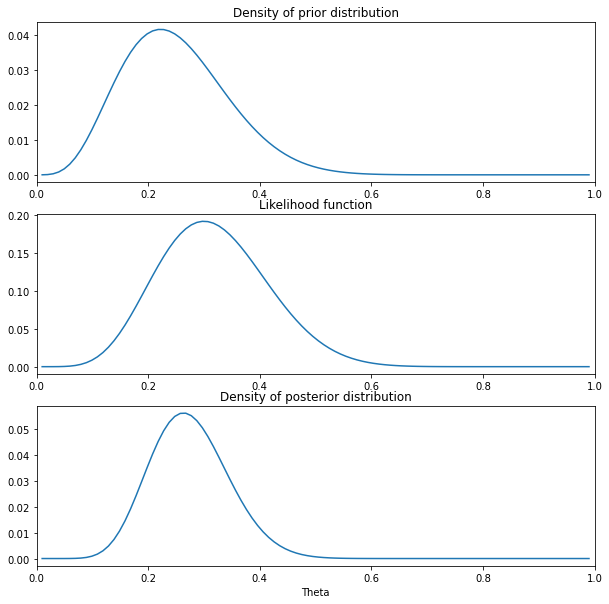

In [210]:
new_drivers = ['no','no','no','yes','no',
               'yes','no','yes','no','no',
               'no', 'yes', 'no', 'no', 'no',
               'yes', 'yes', 'no', 'no', 'no']  # Some new data
new_distracted = [1 if x is 'yes' else 0 for x in new_drivers]

## Complete the required code below
l = binomial_likelihood(p, new_distracted)
post_updated = posterior(post, l)
plot_post(post, l, post_updated, p)

Compare the updated results with the original results and answer the following questions.   
1. How has the MAP point of the posterior changed? Is this change expected? 
2. Is the dispersion of the posterior distribution reduced? 
3. Are the MAP and the maximum of the likelihood function closer together?  

*******************************
**Exercise:** You will now compute and plot the analytical Beta posterior density by these steps:   
1. Compute $a$ and $b$ using the pseudo counts of the prior distribution (based on the national study) and the successes and failures from both sets of observations. 
2. Using these parameters find the Beta density for the values of the Binomial parameter, $\theta$.   
3. Plot the posterior density vs. the Binomial parameter, $\theta$.
4. Compute and print the MAP.  

a = 11  b= 29
MAP = 0.270


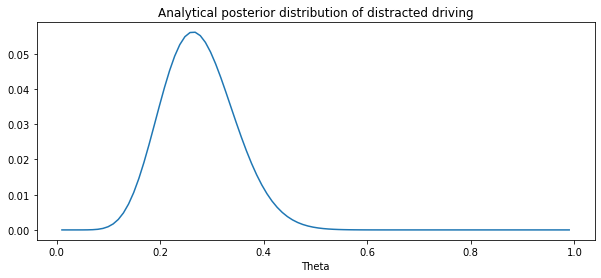

In [240]:
analytic_posterior(distracted + new_distracted, p, 1, 9)    

Compare the analytical result to the previous result. Is the shape and MAP the same as expected?  

## Credible Intervals

A **credible interval** is an interval on the Bayesian posterior distribution. The credible interval is sometime called the highest density interval (HDI), or highest posterior density interval (HPI). As an example, the 90% credible interval encompasses the 90% of the posterior distribution with the highest probability density.  

The credible interval is the Bayesian analog of the frequentist confidence interval. However, these two measures are conceptually different. The confidence interval is chosen on the distribution of a test statistic, whereas the credible interval is computed on the posterior distribution of the parameter. For symmetric distributions the credible interval can be numerically the same as the confidence interval. However, in the general case, these two quantities can be quite different.  

The code in the cell below, plots the posterior distribution of the parameter of the binomial distribution parameter  pp . An approximation of the 95% credible interval, or HDI, is also computed and displayed. Execute this code and examine the result. 


> **Warning!** This code assumes a symmetric prior distribution, so will not work in the general case. 

C:\USERS\STEVEPC2\ANACONDA3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  # Remove the CWD from sys.path while we load stuff.


The 0.950 credible interval is 0.198 to 0.574


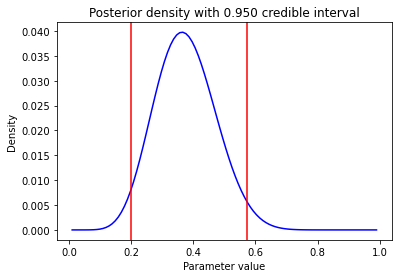

In [19]:
num_samples = 100000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = numpy.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    plt.title('Posterior density with %.3f credible interval' % interval)
    plt.plot(p, post, color='blue')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.axvline(x=ci[0], color='red')
    plt.axvline(x=ci[1], color='red')

    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, ci[0], ci[1]))
    
plot_ci(p, post, num_samples, lower_q, upper_q)

### Simulating from the  posterior distribution: forecasting

So far, we have computed the posterior distribution of the probability parameter $p$. But what about the distribution of distracted drivers? We can compute this distribution by simulating from the posterior distribution of $p$. 

The code in the cell below simulates and plots the distribution of distracted drivers. Run this code and examine the results. 

Text(0, 0.5, 'Probability')

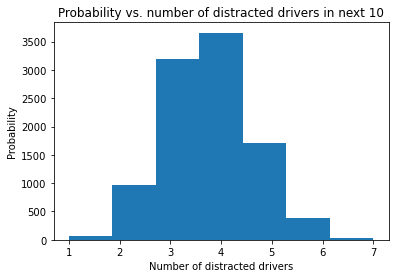

In [20]:
num_cars = 10
num_samples = 10000

counts = (10 * numpy.random.choice(p, size=num_samples, replace=True, p=post)).round()
plt.hist(counts, bins=int(max(counts)))
plt.title('Probability vs. number of distracted drivers in next %d' % num_cars)
plt.xlabel('Number of distracted drivers')
plt.ylabel('Probability')

## Comparing Bayesian models

How can we use Bayesian models to compare two distributions? It turns out that we can compare Bayesian models in several ways. In this lesson, we will compute and compare confidence intervals of the posterior distribution of a model parameter. 

For this example, we will compare the posterior distribution of the heights of sons to the heights of the mothers in the Galton Family dataset. As a first step, we will compute and evaluate Bayesian models for the mean heights using a subset of just 25 observations. 

The code in the cell below sub-samples the Galton family data and then plots histogram of the heights of sons and mothers. Execute this code and examine the results.

In [21]:
families = pandas.read_csv('GaltonFamilies.csv', index_col=0)
families.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,1,78.5,67.0,75.43,4,1,male,73.2
2,1,78.5,67.0,75.43,4,2,female,69.2
3,1,78.5,67.0,75.43,4,3,female,69.0
4,1,78.5,67.0,75.43,4,4,female,69.0
5,2,75.5,66.5,73.66,4,1,male,73.5


Mean of heights: 67.6


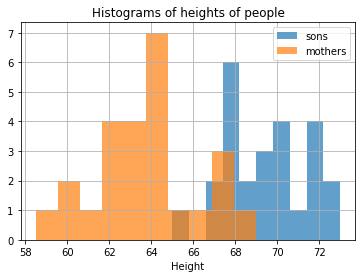

In [22]:
num_samples = 25
male = families[families.gender == 'male'].sample(n=num_samples)

plt.title('Histograms of heights of people')
male.childHeight.hist(label='sons', bins=10, alpha=.7)
male.mother.hist(label='mothers', bins=10, alpha=.7)
plt.xlabel('Height')
plt.legend()

mean_height = numpy.concatenate([male.mother, male.father, male.childHeight,]).mean()
print('Mean of heights: %.1f' % mean_height)

To perform this analysis, we need to select a prior distribution and compute the likelihood. 

First, we will address the likelihood. For these data, we will use a Normal likelihood. For a sample $X = {x_1, x_2, \ldots, x_n}$, we can write the likelihood as:

$$
P(X | u, \sigma) = \bigg(\frac{1}{2 \pi \sigma^2} \bigg)^{\frac{n}{2}} exp \Bigg[ -\frac{1}{2 \sigma^2}  \Bigg( \sum_{i = 1}^n (x_i - \bar{x})^2 + n(\bar{x} - \mu)^2 \Bigg) \Bigg] 
$$
Ignoring constants and normalization:
$$
P(X | u, \sigma) \propto exp \bigg( -\frac{n(\bar{x} - \mu)^2}{2 \sigma^2} \bigg) 
$$

To simplify the computations here, we will only estimate the posterior distribution of the mean. We will use a fixed empirical estimate of the standard deviation. A more complete analysis will also estimate the posterior distribution of the standard deviation.

Mean = 69.484, Standard deviation = 1.988


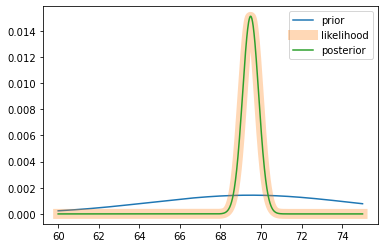

In [23]:
N = 1000
p = numpy.linspace(60, 75, num=N)

pp = scipy.stats.norm.pdf(p, loc=male.childHeight.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_son = comp_like(p, male.childHeight)
post_son = posterior(pp, like_son)

plt.plot(p, pp, label='prior')
plt.plot(p, like_son, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_son, label='posterior')
_=plt.legend()

The code in the cell below computes the posterior distribution of the heights of the mothers. Run this code and examine the results. How do these results differ from the results for the heights of the sons?

Mean = 63.656, Standard deviation = 2.381


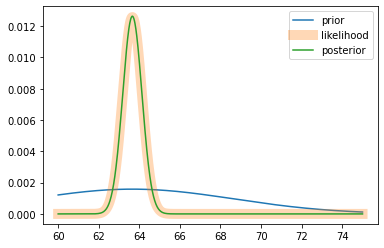

In [24]:
pp_mom = scipy.stats.norm.pdf(p, loc=male.mother.mean(), scale=5)
pp_mom = pp_mom / pp_mom.sum() # normalize

like_mom = comp_like(p, male.mother)
post_mom = posterior(pp_mom, like_mom)

plt.plot(p, pp_mom, label='prior')
plt.plot(p, like_mom, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_mom, label='posterior')
plt.legend()

To compare the posterior distributions of the mean heights of the sons to the distribution of the mean heights of the mothers, we compute and compare the confidence intervals. 

Run the code in the cell below which computes and plots the confidence intervals for the mean heights of the sons. 

C:\USERS\STEVEPC2\ANACONDA3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  # Remove the CWD from sys.path while we load stuff.


The 0.950 credible interval is 68.709 to 70.255


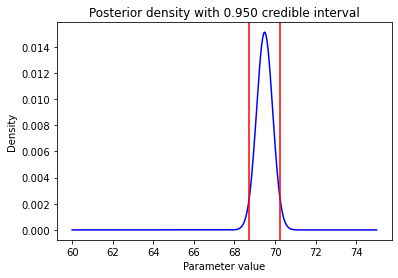

In [25]:
num_samples = 100000

plot_ci(p, post_son, num_samples, lower_q=.025, upper_q=.975)

Next, compute and plot the posterior distribution and CIs of the mean of the heights of the mothers.  

The 0.950 credible interval is 62.732 to 64.595


C:\USERS\STEVEPC2\ANACONDA3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  # Remove the CWD from sys.path while we load stuff.


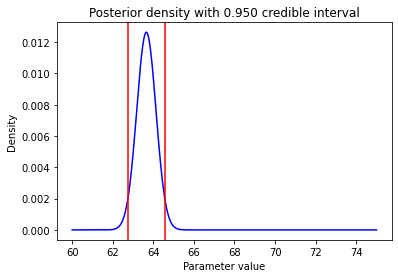

In [26]:
plot_ci(p, post_mom, num_samples, lower_q=.025, upper_q=.975)

Examine the CIs for these posterior distributions. Are the distributions of the mean heights of sons and mothers significantly different?  

***
**Your turn:** Try the variations on the foregoing Bayesian analysis.

1. The foregoing Bayesian analysis was performed with just 25 data points. Rerun this analysis with with 250 data points. How do the posterior distributions computed with the 250 data points compare to those computed with 25 data points? 
2. Perform the same analysis, except comparing the distributions of heights of sons and heights of fathers. 

**Important!:** Use another variable name for the likelihood and posterior for this exercise. 
***

### Simulation from the posterior distribution

Once we have a posterior distribution for parameters we can simulate from this distribution. The simulation consists of taking a number of random draws from the posterior parameter distribution and computing the posterior distribution of the data values. 

There are a number of reasons why you might want to simulate from the posterior distribution of data values.

- Test the model against the data.
- Compute forecasts of the dependent (label) variable from the model.

The code in the cell below computes the posterior distribution of the heights of sons. This is done by computing the distribution of height based on realizations of the parameter (the mean) from the posterior distribution. The density distribution of the simulated heights is plotted along with the histogram of the original data. Execute this code and examine the results.

C:\USERS\STEVEPC2\ANACONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


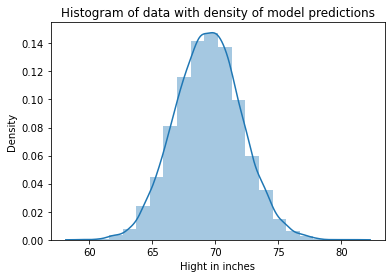

In [27]:
def sim_height(n, sigma, p, post):
    # create the probability-weighted random sample of values of the mean height
    mu = numpy.random.choice(p, size=n, replace=True, p=post)
    return scipy.stats.norm.rvs(loc=mu, scale=sigma, size=n)

def plot_dist(n, post, dat):
    seaborn.distplot(post, bins=20)
    plt.title('Histogram of data with density of model predictions')
    plt.xlabel('Hight in inches')

sim_vals = sim_height(10000, sigma=2.616329, p=p, post=post_son)
plot_dist(10000, sim_vals, male.childHeight)

Examine this chart. How well does the density of the posterior value distribution match the histogram of the original data values? Does the density of the posterior value distribtion deviate from Normal? 

***
**Your turn:** Use the model you computed with 250 data values to create a plot like the one above. Examine these results and compare them to the results obtained with the model created with only 25 data values. Which posterior density function appears to represent the data better and why? Does the density deviate from Normal?
***

## Summary

In this lesson, you have explored the following concepts:

1. Application of Bayes Theorem.
2. Computation of marginal distribtuions.
3. Selection and computation of prior distributions.
4. Selection and computation of likelihoods.
5. Computation of posterior distributions.
6. Computation and comparison of credible intervals. 
7. Simulation of data values from posterior distribution of model parameters.

## Further reading

There are numerous books and articles on Bayesian data analysis. Further, there is a growing number of powerful software packages that can be used for Bayesian data analysis.

### Some introductory texts

These two books provide a broad and readable introduction to Bayesian data analysis... well, sort of. Both books contain extensive examples using R and specialized Bayes packages.

<img src="img/StatisticalRethinking.jpg" alt="Drawing" style="width:200px; height:275px"/>

<img src="img/DoingBaysianDataAnalysis.jpg" alt="Drawing" style="width:200px; height:275px"/>


### Modeling reference

This book contains a comprehensive treatment of applying Bayesian models. The level of treatments in intermediate. The examples are from the social sciences, but the methods can be applied more widely. The examples use R and specialized Bayes packages. 

<img src="img/BayesRegression.jpg" alt="Drawing" style="width:200px; height:275px"/>

### Theory 

This book contains a comprehensive overview of the modern theory of Bayesian models. The book is at an advanced level. Only theory is addressed, which only very limited R code examples.  

<img src="img/BaysianDataAnalysis.jpg" alt="Drawing" style="width:200px; height:275px"/>

#### Copyright 2017, 2018, 2019, 2020, Stephen F Elston. All rights reserved.